# Video game sales

## Importing required packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

## Importing Data

In [3]:
df = pd.read_csv("data/proj59/vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Cleaning data

In [4]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
len(df)

16598

In [6]:

df["Year"].fillna(df["Year"].mode()[0], inplace=True)
df.dropna(inplace=True)

In [7]:
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [8]:
len(df)

16540

## Exploring the data

In [9]:
df.keys()

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [10]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16540.000000,16540.000000,16540.000000,16540.000000,16540.000000,16540.000000,16540.000000
mean,8294.197642,2006.444619,0.265079,0.146883,0.077998,0.048191,0.538426
std,4790.703200,5.796957,0.817929,0.506129,0.309800,0.188879,1.557424
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4143.750000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12440.250000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


### Visualizing data

#### Bar Plot - Global Sales on Genre

In [11]:
genre_sales = df.groupby("Genre")["Global_Sales"].sum()
genre_sales

Genre
Action          1750.33
Adventure        238.77
Fighting         445.70
Misc             802.15
Platform         830.87
Puzzle           244.94
Racing           732.03
Role-Playing     927.31
Shooter         1037.32
Simulation       391.96
Sports          1329.35
Strategy         174.83
Name: Global_Sales, dtype: float64

Text(0, 0.5, 'Global Sales (in millions)')

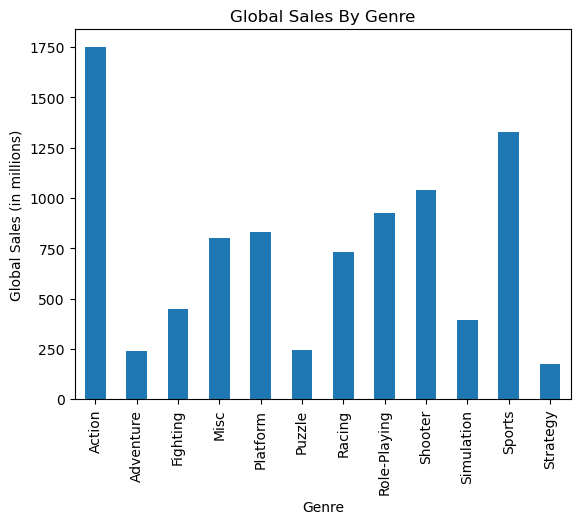

In [12]:
genre_sales.plot(kind='bar')
plt.title("Global Sales By Genre")
plt.xlabel("Genre")
plt.ylabel("Global Sales (in millions)")

#### Line Plot - Global Sales according to year

Text(0, 0.5, 'Global Sales (in millions)')

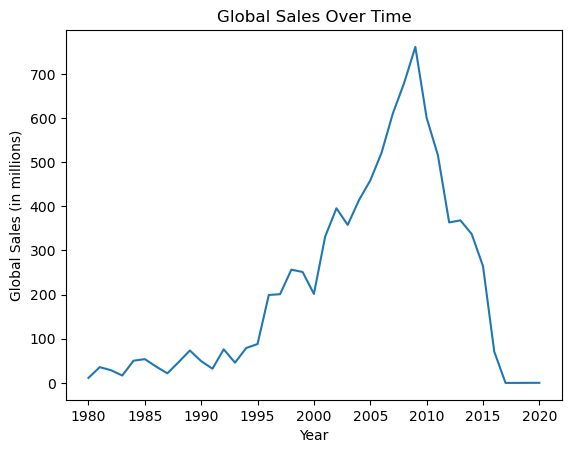

In [13]:
year_sales = df.groupby("Year")["Global_Sales"].sum()
year_sales.plot()
plt.title("Global Sales Over Time")
plt.xlabel("Year")
plt.ylabel("Global Sales (in millions)")

#### Histogram - Distribution

Text(0, 0.5, 'Frequency')

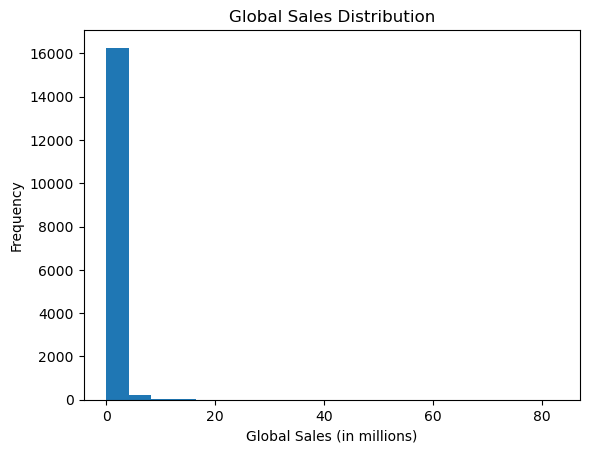

In [14]:
plt.hist(df["Global_Sales"], bins=20)

plt.title("Global Sales Distribution")
plt.xlabel("Global Sales (in millions)")
plt.ylabel("Frequency")


#### Other Sales

In [15]:
other_sales =  df[["NA_Sales", "EU_Sales", "JP_Sales"]].sum()

Text(0, 0.5, 'Sales (in million)')

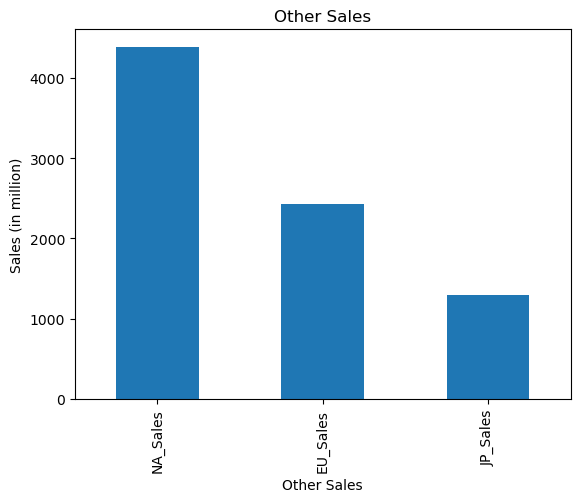

In [16]:
other_sales.plot(kind='bar')
plt.title("Other Sales")
plt.xlabel("Other Sales")
plt.ylabel("Sales (in million)")

## Pre-Processing Data

In [17]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [21]:
df["Global_Sales"][df["Publisher"] == "Nintendo"]

0        82.74
1        40.24
2        35.82
3        33.00
4        31.37
         ...  
16269     0.01
16357     0.01
16456     0.01
16473     0.01
16542     0.01
Name: Global_Sales, Length: 703, dtype: float64

In [32]:
## Pre-Processing data to future prediction global sales of publisher Nintendo

X = df["Year"][df["Publisher"] == "Nintendo"]
y = df["Global_Sales"][df["Publisher"] == "Nintendo"]

len(X), len(y)

(703, 703)

<BarContainer object of 703 artists>

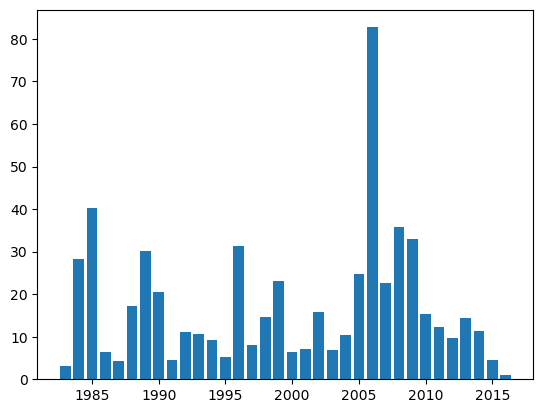

In [33]:
plt.bar(X, y)

<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

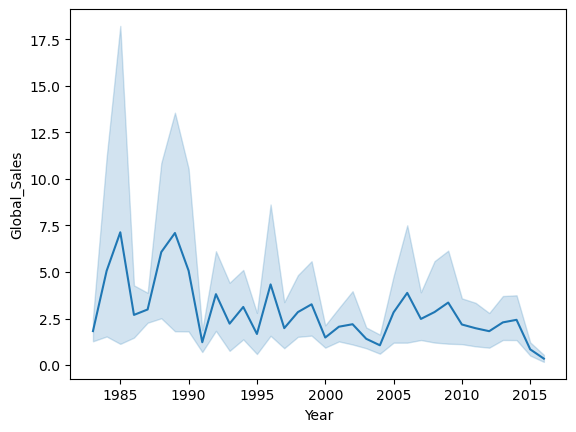

In [34]:
import seaborn as sns
sns.lineplot(x = X, y = y)

/home/djoe/Documents/myprogramming/hackpython/dataScience/udemy_proj/env/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


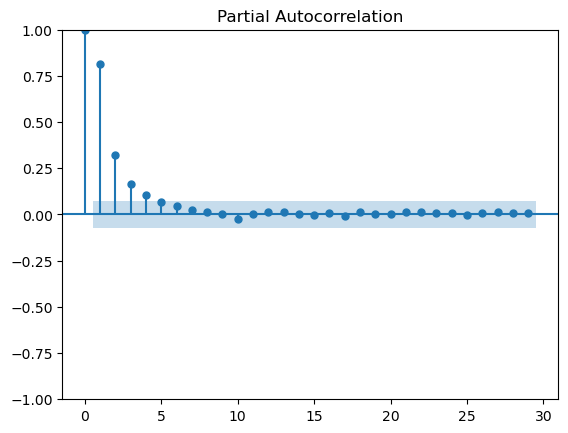

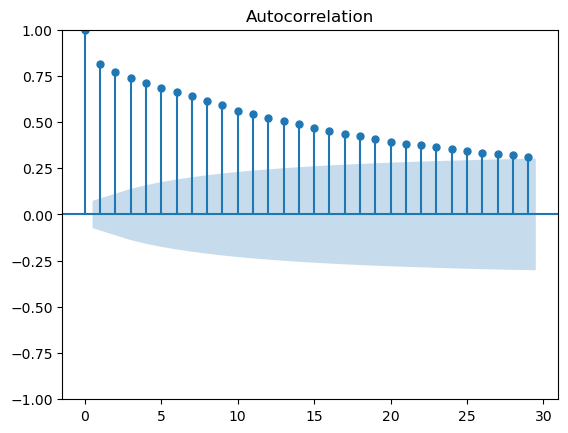

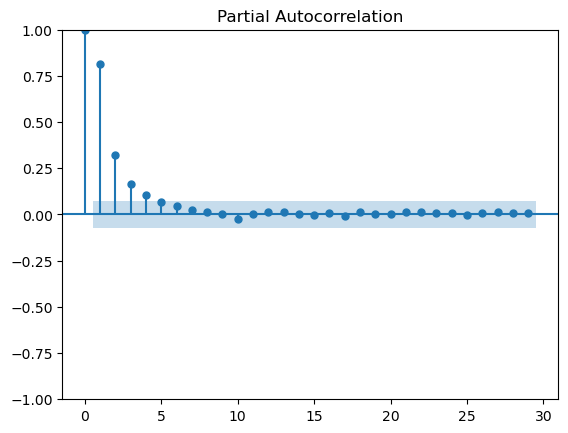

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(y)
plot_pacf(y)

In [36]:
X = X.to_numpy()

In [38]:
X = np.expand_dims(X, axis=1)

In [39]:
y = y.to_numpy()
y[:10]

array([82.74, 40.24, 35.82, 33.  , 31.37, 30.26, 30.01, 29.02, 28.62,
       28.31])

## Training Model

In [40]:
from sklearn.linear_model import LinearRegression


reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

## Making Predictions

In [65]:
X_future = np.array([[2017], [2018], [2019], [2020], [2021], [2022], [2023], [2024]])
y_pred = reg.predict(X_future)
y_pred

array([1.56528876, 1.49088386, 1.41647896, 1.34207406, 1.26766916,
       1.19326426, 1.11885936, 1.04445446])

/home/djoe/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


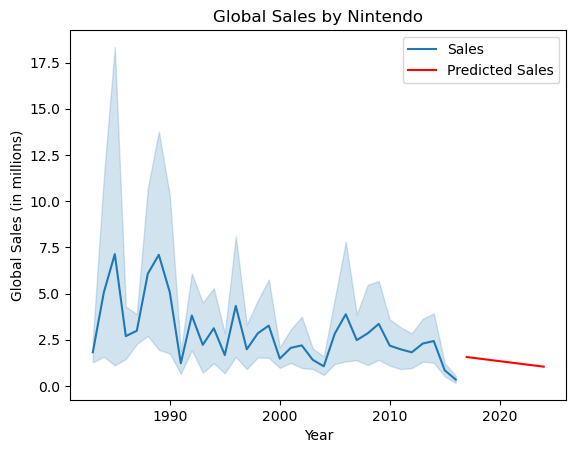

In [68]:
sns.lineplot(x = X.reshape(-1), y = y, label='Sales')
sns.lineplot(X_future.reshape(-1), y_pred, color='r', label='Predicted Sales')
plt.xlabel("Year")
plt.ylabel("Global Sales (in millions)")
plt.title("Global Sales by Nintendo")
plt.show()

In [64]:
X.max()

2016.0